In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
def plot_scores( data_tmp, title="" ):

    fig = plt.figure(figsize=(20,5))
    data_tmp = data_tmp.copy()
    
    plt.suptitle(f"Comparaison des scores pour les {title}")
    
    #data_tmp['Method'] = data_tmp['Method'].apply(lambda x: str(x).rjust(100,'-').upper())
    
    labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN']
    if( data_tmp.shape[0] == 4):
        labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
    elif( data_tmp.shape[0] == 2):
        labels = ['Logistic Regression', 'XGBoost']
    elif( data_tmp.shape[0] == 1):
        labels = ['Logistic Regression']

    ax1 = plt.subplot(1,3,1)
    sns.barplot(data=data_tmp, y='Method', x='ROC AUC')
    plt.xlim([0, 1])
    plt.title("ROC AUC")
    ax1.bar_label(ax1.containers[0])
    ax1.set_yticklabels(labels)

    ax2 = plt.subplot(1,3,2)
    sns.barplot(data=data_tmp, y='Method', x='F1 score')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("F1 score")
    ax2.axes.yaxis.set_visible(False)
    ax2.bar_label(ax2.containers[0])

    ax3 = plt.subplot(1,3,3)
    sns.barplot(data=data_tmp, y='Method', x='Recall')
    plt.xticks(rotation=90)
    plt.xlim([0, 1])
    plt.title("Recall")
    ax3.axes.yaxis.set_visible(False)
    ax3.bar_label(ax3.containers[0])

    fig.tight_layout()

    plt.show()

In [4]:
data_spot = pd.read_csv('data/scores.csv')
data_spot

,Method,threshold,params,ROC AUC,PR AUC,F1 score,Accuracy,Precision,Recall,TP,TN,FP,FN,Training time,Inference time
0,DummyClassifier,NaN,"{'random_state': [0], 'strategy': ['stratified']}",0.490519,0.078885,0.066578,0.844222,0.063939,0.069444,25,3774,366,335,1.241020,0.003584
1,Basic LogisticRegression,NaN,"{'random_state': [0], 'max_iter': [3000]}",0.732972,0.199926,0.005464,0.919111,0.166667,0.002778,1,4135,5,359,7.344209,0.025940
2,Basic LogisticRegression [w/thresholding],0.241,"{'random_state': [0], 'max_iter': [3000]}",0.732972,0.199926,0.203866,0.899333,0.277512,0.161111,58,3989,151,302,7.344209,0.008685
3,Basic DecisionTreeClassifier,NaN,{'random_state': [0]},0.521256,0.084428,0.122449,0.847111,0.113208,0.133333,48,3764,376,312,2.529593,0.012918
4,Basic DecisionTreeClassifier [w/thresholding],0.999,{'random_state': [0]},0.521256,0.084428,0.122449,0.847111,0.113208,0.133333,48,3764,376,312,2.529593,0.006264
5,Basic KNeighborsClassifier,NaN,{},0.541067,0.088950,0.010309,0.914667,0.071429,0.005556,2,4114,26,358,0.258407,6.854248
6,Basic KNeighborsClassifier [w/thresholding],0.389,{},0.541067,0.088950,0.100840,0.881111,0.127660,0.083333,30,3935,205,330,0.258407,3.331389
7,Basic RandomForestClassifier,NaN,{'random_state': [0]},0.686125,0.170760,0.000000,0.920000,0.000000,0.000000,0,4140,0,360,2.784127,0.142599
8,Basic RandomForestClassifier [w/thresholding],0.680,{'random_state': [0]},0.686125,0.170760,0.000000,0.920000,0.000000,0.000000,0,4140,0,360,2.784127,0.075645
9,Basic XGBClassifier,NaN,"{'seed': [0], 'objective': ['binary:logistic']...",0.713682,0.214494,0.111650,0.918667,0.442308,0.063889,23,4111,29,337,9.182019,0.034857


In [68]:
data_tuning = pd.read_csv('data/scores_tuning.csv')
data_tuning

,Method,threshold,params,ROC AUC,PR AUC,F1 score,Accuracy,Precision,Recall,Custom,TP,TN,FP,FN,Training time,Inference time
0,LogisticRegression [w/features],NaN,"[{'class_weight': ['balanced'], 'random_state'...",0.732030,0.202645,0.245559,0.679111,0.151223,0.652778,0.392452,235,2821,1319,125,10.979974,0.046618
1,LogisticRegression [w/threshold + features],0.402,"[{'class_weight': ['balanced'], 'random_state'...",0.732030,0.202645,0.214313,0.543778,0.124279,0.777778,0.379096,280,2167,1973,80,10.979974,0.014015
2,XGBClassifier [w/features],NaN,"{'scale_pos_weight': [11.481644640234949], 'se...",0.724231,0.203623,0.243750,0.677333,0.150000,0.650000,0.390000,234,2814,1326,126,215.627799,0.047619
3,XGBClassifier [w/thresholding + features],0.349,"{'scale_pos_weight': [11.481644640234949], 'se...",0.724231,0.203623,0.189356,0.387333,0.105886,0.894444,0.359295,322,1421,2719,38,215.627799,0.017224
4,LogisticRegression [w/features + rec_selection],NaN,"[{'class_weight': ['balanced'], 'random_state'...",0.732358,0.200151,0.242708,0.676889,0.149359,0.647222,0.388333,233,2813,1327,127,40.215065,0.009238
5,LogisticRegression [w/threshold + features + r...,0.432,"[{'class_weight': ['balanced'], 'random_state'...",0.732358,0.200151,0.227254,0.582889,0.133398,0.766667,0.393274,276,2347,1793,84,40.215065,0.009250
6,XGBClassifier [w/features + rec_selection],NaN,"{'scale_pos_weight': [11.481644640234949], 'se...",0.724667,0.209930,0.237306,0.672889,0.145860,0.636111,0.380399,229,2799,1341,131,134.036004,0.016036
7,XGBClassifier [w/threshold + features + rec_se...,0.371,"{'scale_pos_weight': [11.481644640234949], 'se...",0.724667,0.209930,0.197760,0.442889,0.111754,0.858333,0.367420,309,1684,2456,51,134.036004,0.009470
8,LogisticRegression [w/features + nimp_selection],NaN,"[{'class_weight': ['balanced'], 'random_state'...",0.727618,0.204560,0.241113,0.672667,0.148008,0.650000,0.387289,234,2793,1347,126,31.695137,0.005893
9,LogisticRegression [w/threshold + features + n...,0.331,"[{'class_weight': ['balanced'], 'random_state'...",0.727618,0.204560,0.195566,0.411333,0.109785,0.894444,0.368168,322,1529,2611,38,31.695137,0.010734


## Les modèles sans aucun ajustement

,Method,ROC AUC,F1 score,Precision,Recall
1,Basic LogisticRegression,0.732972,0.005464,0.166667,0.002778
3,Basic DecisionTreeClassifier,0.521256,0.122449,0.113208,0.133333
5,Basic KNeighborsClassifier,0.541067,0.010309,0.071429,0.005556
7,Basic RandomForestClassifier,0.686125,0.000000,0.000000,0.000000
9,Basic XGBClassifier,0.713682,0.111650,0.442308,0.063889


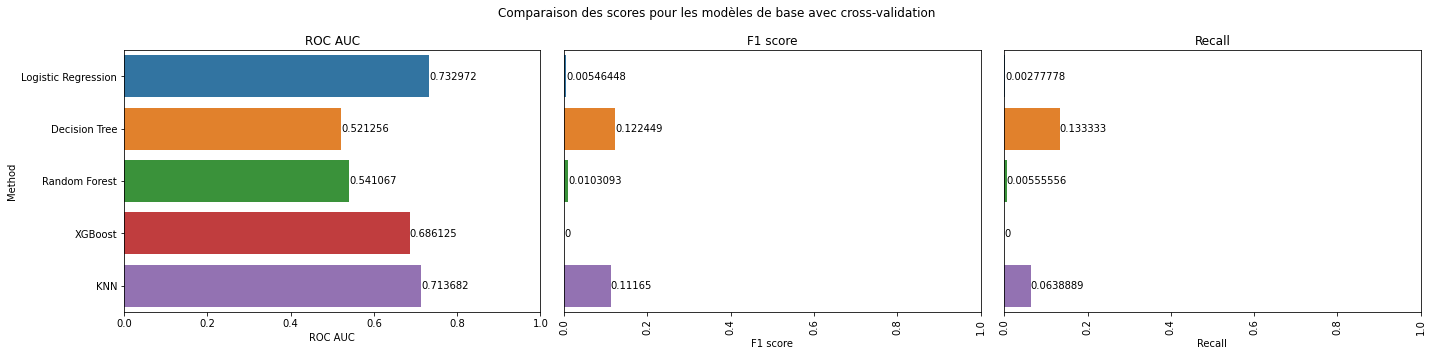

In [69]:
basic = data_spot[ ~(data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Basic')) ][['Method','ROC AUC', 'F1 score', 'Precision', 'Recall']]
display(basic)
plot_scores( basic, "modèles de base avec cross-validation")

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv`

,Method,ROC AUC,F1 score,Precision,Recall
11,Grid LogisticRegression,0.733814,0.0,0.0,0.0
13,Grid DecisionTreeClassifier,0.641568,0.0,0.0,0.0
15,Grid RandomForestClassifier,0.714838,0.0,0.0,0.0
17,Grid XGBClassifier,0.722834,0.0,0.0,0.0
19,Grid KNeighborsClassifier,0.605833,0.0,0.0,0.0


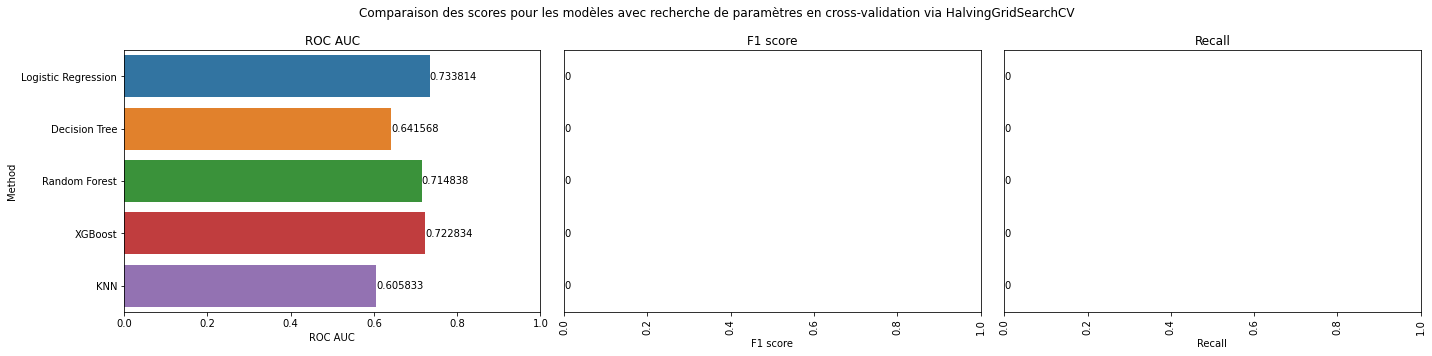

In [70]:
grid = data_spot[ ~(data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Grid')) ][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall']]
grid_t = data_spot[ (data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Grid')) ][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall']]
display(grid)
plot_scores( grid, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV" )

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` 

,Method,ROC AUC,F1 score,Precision,Recall
21,Balanced LogisticRegression,0.730879,0.243271,0.149491,0.652778
23,Balanced DecisionTreeClassifier,0.679716,0.232193,0.145467,0.575000
25,Balanced RandomForestClassifier,0.703471,0.229421,0.141825,0.600000
27,Balanced XGBClassifier,0.722080,0.244833,0.151277,0.641667


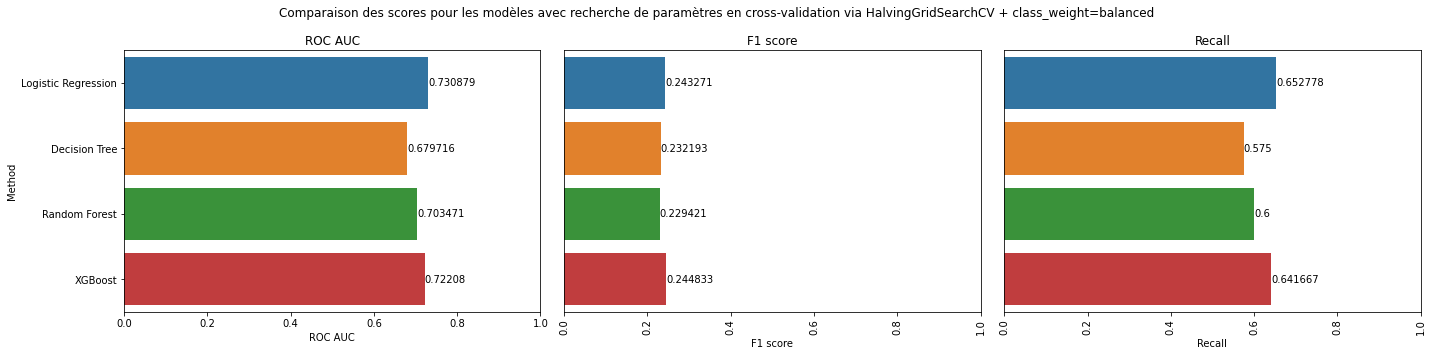

In [71]:
balanced = data_spot[ ~(data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Balanced')) & ~(data_spot.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall']]
balanced_t = data_spot[ (data_spot.Method.str.contains('threshold')) & (data_spot.Method.str.contains('Balanced')) & ~(data_spot.Method.str.contains('features'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall']]
display(balanced)
plot_scores( balanced, "modèles avec recherche de paramètres en cross-validation via HalvingGridSearchCV + class_weight=balanced" )

>#### A ce stade les deux meilleurs modèles sur la base du ROC AUC score, sont :
> - `Balanced LogisticRegression` *(0.730879)* 
> - `Balanced XGBClassifier` *(0.722080)*.

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features`

,Method,ROC AUC,F1 score,Precision,Recall,Custom
0,LogisticRegression [w/features],0.732030,0.245559,0.151223,0.652778,0.392452
2,XGBClassifier [w/features],0.724231,0.243750,0.150000,0.650000,0.390000


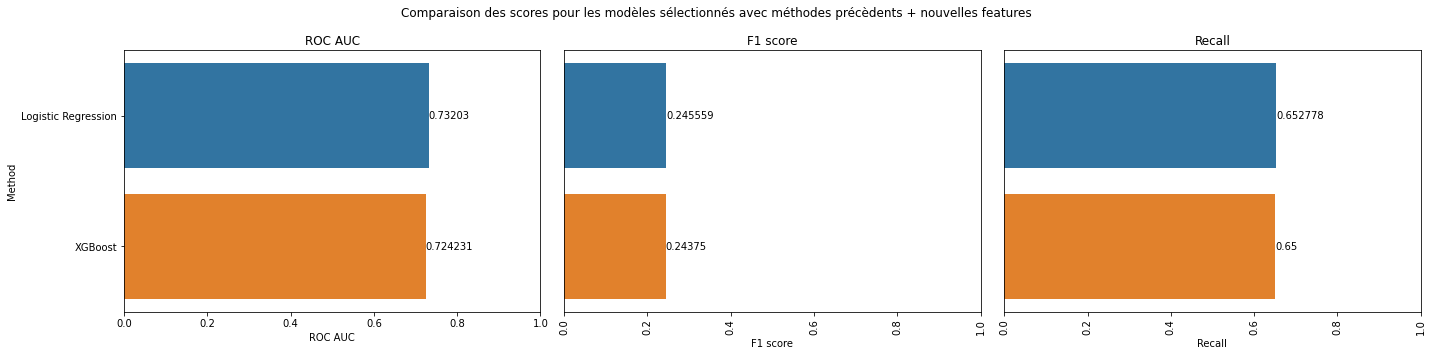

In [72]:
extrafeatures = data_tuning[ ~(data_tuning.Method.str.contains('threshold|custom|nimp|rec')) & (data_tuning.Method.str.contains('[w/features]'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall', 'Custom']]
display(extrafeatures)
plot_scores( extrafeatures, "modèles sélectionnés avec méthodes précèdents + nouvelles features" )

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features` + `feature selection`

,Method,ROC AUC,F1 score,Precision,Recall,Custom
4,LogisticRegression [w/features + rec_selection],0.732358,0.242708,0.149359,0.647222,0.388333
6,XGBClassifier [w/features + rec_selection],0.724667,0.237306,0.145860,0.636111,0.380399


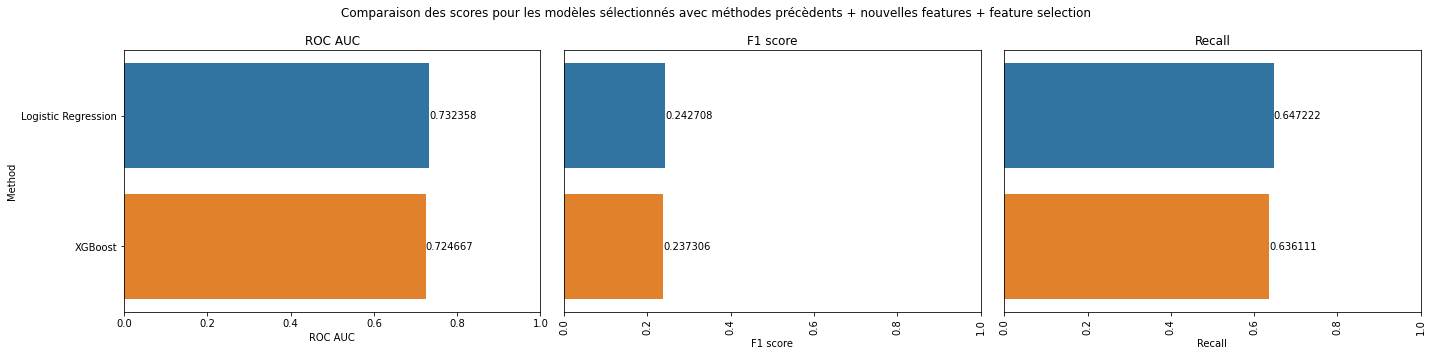

In [73]:
fselection1 = data_tuning[~(data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('rec'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall', 'Custom']]
display(fselection1)
plot_scores( fselection1, "modèles sélectionnés avec méthodes précèdents + nouvelles features + feature selection" )

,Method,ROC AUC,F1 score,Precision,Recall,Custom
8,LogisticRegression [w/features + nimp_selection],0.727618,0.241113,0.148008,0.650000,0.387289
10,XGBClassifier [w/features + nimp_selection],0.724475,0.240625,0.148077,0.641667,0.385000


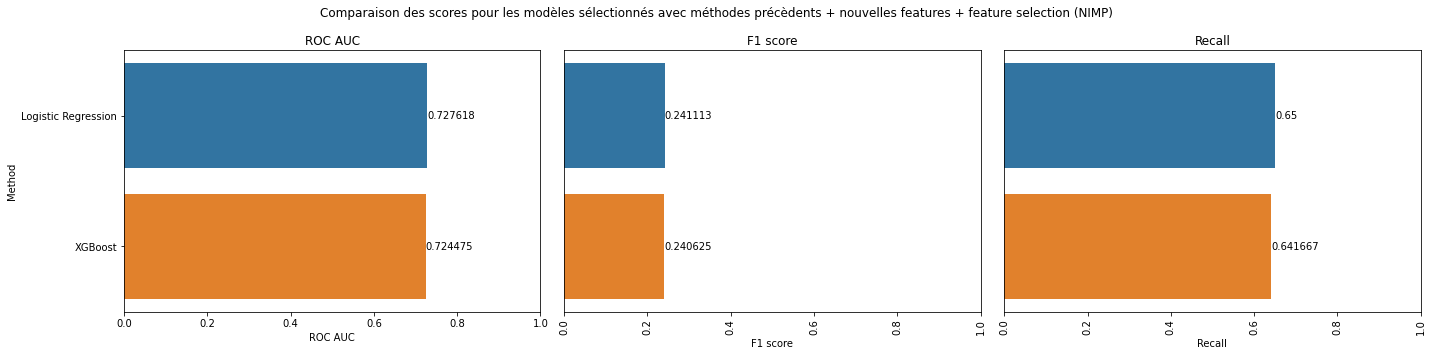

In [74]:
fselection2 = data_tuning[~(data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('nimp'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall', 'Custom']]
display(fselection2)
plot_scores( fselection2, "modèles sélectionnés avec méthodes précèdents + nouvelles features + feature selection (NIMP)" )

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features` + `feature selection` + `custom metric (Fbeta)`

,Method,ROC AUC,F1 score,Precision,Recall,Custom
12,LogisticRegression [w/features + custom_metric],0.712618,0.230428,0.140036,0.65,0.376085
14,XGBClassifier [w/features + custom_metric],0.714255,0.237805,0.145522,0.65,0.383858


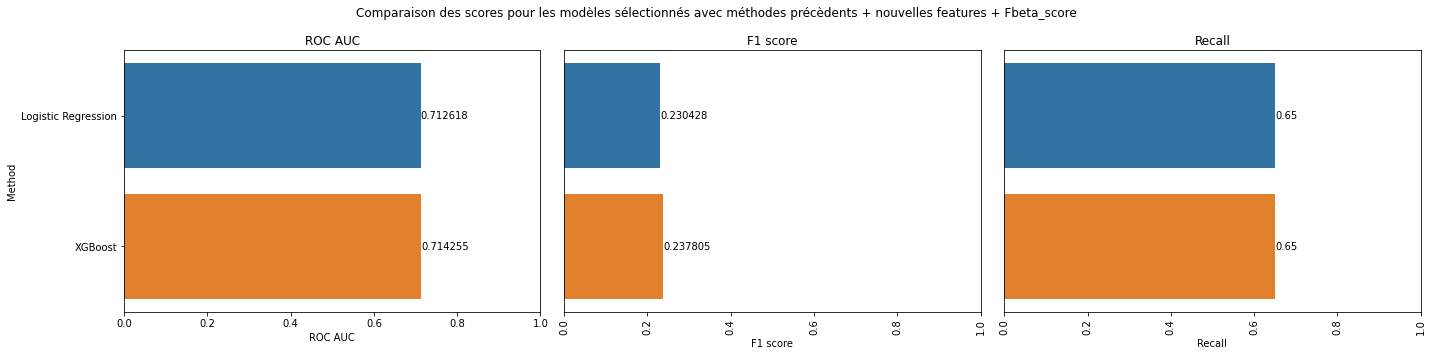

In [77]:
fbeta2 = data_tuning[~(data_tuning.Method.str.contains('threshold|Final')) & (data_tuning.Method.str.contains('custom'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall', 'Custom']]
display(fbeta2)
plot_scores( fbeta2, "modèles sélectionnés avec méthodes précèdents + nouvelles features + Fbeta_score" )

## Les modèles avec une recherche des meilleurs paramètres via `gridsearchcv` + `class_weight='balanced'` + `nouvelles features` + `feature selection` + `custom metric (Fbeta)` + `seuillage`

,Method,ROC AUC,F1 score,Precision,Recall,Custom
13,LogisticRegression [w/threshold + features + c...,0.712618,0.184831,0.102813,0.913889,0.354526
15,XGBClassifier [w/threshold + features + custom...,0.714255,0.203954,0.116528,0.816667,0.370931


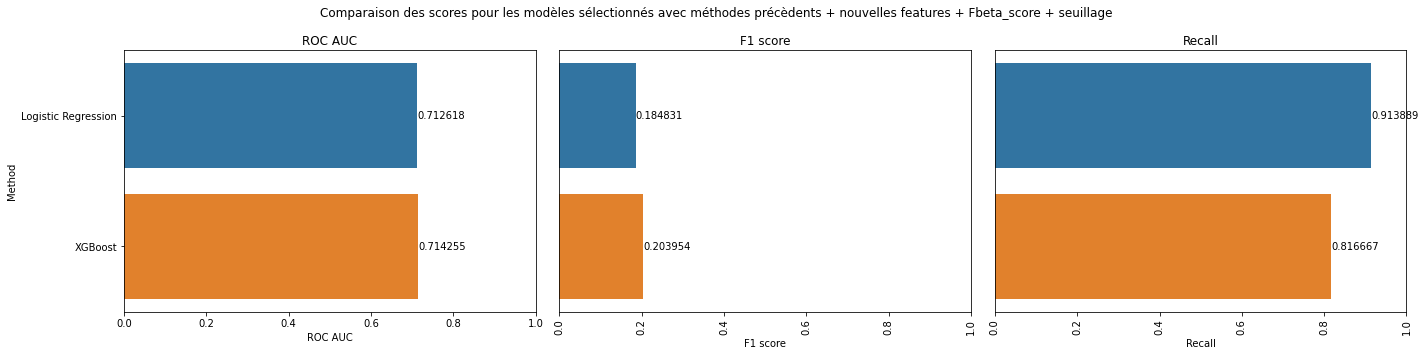

In [80]:
fbeta2_t = data_tuning[ ~(data_tuning.Method.str.contains('Final')) & (data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('custom'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall', 'Custom']]
display(fbeta2_t)
plot_scores( fbeta2_t, "modèles sélectionnés avec méthodes précèdents + nouvelles features + Fbeta_score + seuillage" )

## Le meilleur modèle ré-entrainé et testé sur un dataset complet

,Method,ROC AUC,F1 score,Precision,Recall,Custom
16,Final LogisticRegression [w/features + custom_...,0.757664,0.267975,0.165899,0.696563,0.351051


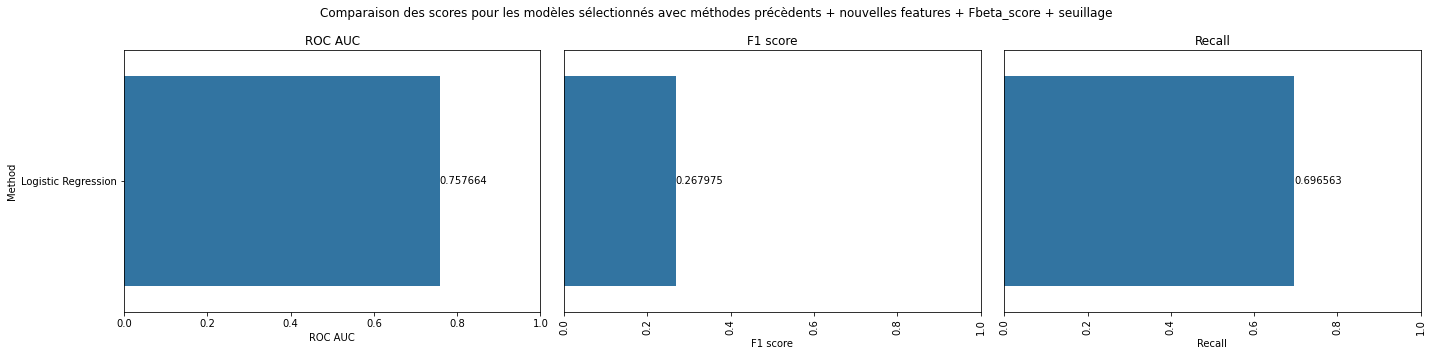

In [85]:
final = data_tuning[ ~(data_tuning.Method.str.contains('threshold')) & (data_tuning.Method.str.contains('Final'))][['Method', 'ROC AUC', 'F1 score', 'Precision', 'Recall', 'Custom']]
display(final)
plot_scores(final, "modèles sélectionnés avec méthodes précèdents + nouvelles features + Fbeta_score + seuillage" )